<a href="https://colab.research.google.com/github/matvid/Proyecto-2/blob/main/Proyecto_2_Football_Players'_Transfer_Fee_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICCIÓN VALORES DE TRANSFERENCIA DE JUGADORES DE FÚTBOL**

Este conjunto de datos se lleva a cabo para crear un modelo predictivo para los valores de transferencia de jugadores de fútbol.

## **Carga de datos**

Se inicia montando el Drive.

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


A continuación, se importan las librerías que se utilizarán.

In [2]:
# Importar librerías generales
import numpy as np
import pandas as pd

# Importar librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Importar librerías de sklearn para manipulación de datos
from sklearn import set_config
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
set_config(display="diagram")

# Importar librerías relacionadas con modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importar modelos ensamblados
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Importar librerías relacionadas con métricas de evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, ConfusionMatrixDisplay, roc_curve, auc

# Importar librerías relacionadas con búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV

Se realiza la carga del dataframe.

In [61]:
filename = ("/content/drive/MyDrive/Bootcamp/Coding Dojo/Proyecto 2/Data/opcion3.csv")
df = pd.read_csv(filename)
pd.set_option('display.max_columns', None)

## **Visualización de los datos generales**

**Fuente de datos:**

https://www.kaggle.com/datasets/khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset

**Diccionario de datos**

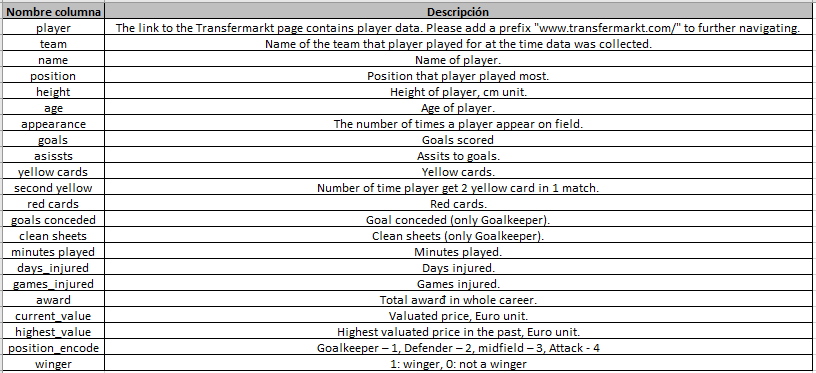

Se visualiza el encabezado del dataframe.

In [62]:
df.head(5)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


Se visualiza la cola del dataframe.

In [63]:
df.tail(5)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.0,0.0,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.0,0.0,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.0,0.0,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.0,0.0,865,0,0,0,50000,50000,4,0
10753,/alexander-badolato/profil/spieler/957230,Western Sydney Wanderers,Alexander Badolato,Attack Centre-Forward,170.000000,18.0,21,0.000000,0.000000,0.086042,0.0,0.000000,0.0,0.0,1046,0,0,0,25000,25000,4,0


Se identifica la estructura del dataframe.

In [64]:
df.shape
print(f"El dataframe consta de", df.shape[0], "filas y", df.shape[1], "columnas.")

El dataframe consta de 10754 filas y 22 columnas.


Se visualiza en detalle las columnas del dataframe.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

## **Análisis de los datos**

### - **Revisión información duplicada**

In [66]:
df.duplicated().sum()

0

No se identifican filas duplicadas en el dataframe.

### - **Revisión valores faltantes**

In [67]:
df.isna().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

No se identifican valores faltantes en el dataframe.

### - **Revisión individual de las columnas**

- **Revisión columna "player"**

In [68]:
df["player"].nunique()

10754

Como fue visualizado anteriormente, la columna "player" es un código único que combina varias variables, como lo son el nombre y un identificador. Con este código se comprueba que esta columna contiene sólo datos únicos para cada fila.

- **Revisión columna "team"**

In [69]:
df["team"].nunique()

374

Se identifica que los 10754 jugadores están distribuidos entre 374 equipos de fútbol.

- **Revisión columna "team"**

In [70]:
df["name"].nunique()

10584

En esta columna se destaca que existen 170 nombres de futbolistas repetidos.

- **Revisión columna "position"**

In [71]:
df["position"].value_counts().sort_index()

Attack                          53
Attack Centre-Forward         1353
Attack-LeftWinger              714
Attack-RightWinger             717
Attack-SecondStriker            65
Defender                        33
Defender Centre-Back          1821
Defender Left-Back             807
Defender Right-Back            867
Goalkeeper                    1229
midfield                        75
midfield-AttackingMidfield     769
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
midfield-LeftMidfield          100
midfield-RightMidfield         102
Name: position, dtype: int64

En este dataframe se identifican 16 posiciones diferentes.

- **Revisión columna "height"**

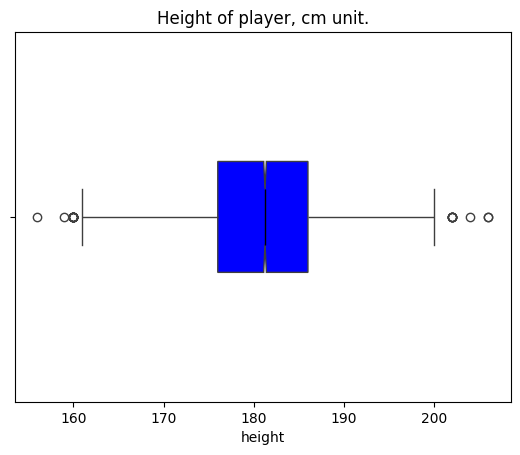

In [72]:
sns.boxplot(x=df["height"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Height of player, cm unit.")

plt.show();

In [73]:
df["height"].describe()

count    10754.000000
mean       181.240353
std          6.969818
min        156.000000
25%        176.000000
50%        181.240353
75%        186.000000
max        206.000000
Name: height, dtype: float64

En la columna "height", que representa las estaturas de los futbolistas, la media es de 181.24 cm. La mayoría de los jugadores tienen estaturas que van desde 176 cm hasta 186 cm, mientras que algunos casos extremos se encuentran fuera de este rango, con el futbolista más bajo midiendo 156 cm y el más alto midiendo 206 cm.

- **Revisión columna "age"**

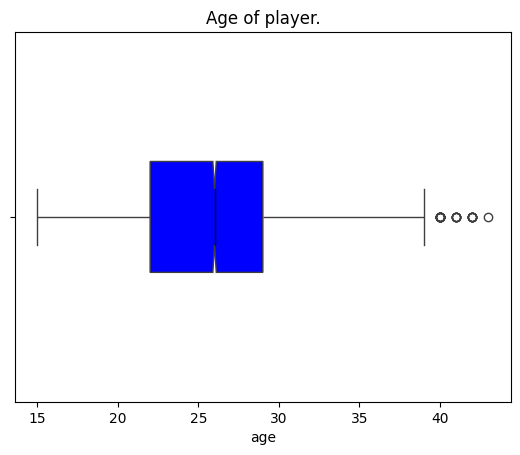

In [74]:
sns.boxplot(x=df["age"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Age of player.")

plt.show();

In [75]:
df["age"].describe()

count    10754.000000
mean        26.041903
std          4.777629
min         15.000000
25%         22.000000
50%         26.000000
75%         29.000000
max         43.000000
Name: age, dtype: float64

En la columna "age", que representa las edades de los futbolistas, la media es de 26.04 años. La mayoría de los jugadores tienen edades que van desde los 22 a los 29 años, mientras que algunos casos extremos se encuentran fuera de este rango, con el futbolista más joven con 15 años y el más viejo con 43 años.

- **Revisión columna "appearance"**

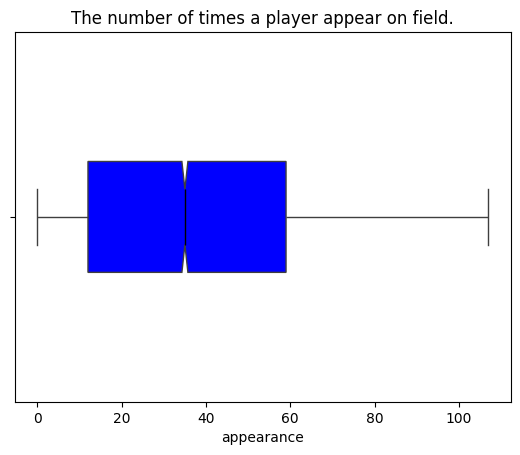

In [76]:
sns.boxplot(x=df["appearance"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("The number of times a player appear on field.")

plt.show();

In [77]:
df["appearance"].describe()

count    10754.000000
mean        36.407011
std         26.526541
min          0.000000
25%         12.000000
50%         35.000000
75%         59.000000
max        107.000000
Name: appearance, dtype: float64

En la categoría "apariciones" de la columna, que representa la frecuencia con la que un jugador entra al campo, la media es de 36.40 veces. La mayoría de los jugadores tienen un rango de apariciones que va desde 12 hasta 59 partidos. Sin embargo, existen algunos casos extremos, como aquellos jugadores que no han participado en ningún partido, así como otros que han jugado un total de 107 veces.

- **Revisión columna "goals"**

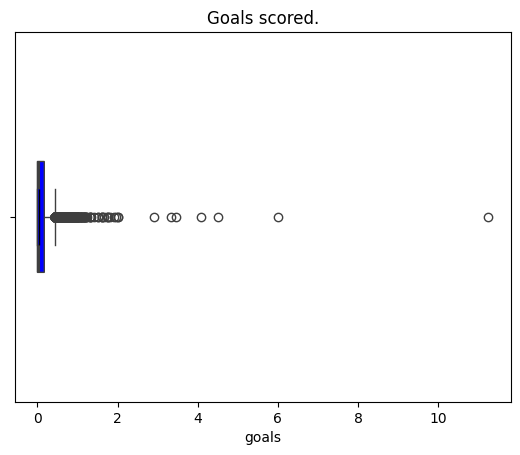

In [78]:
sns.boxplot(x=df["goals"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Goals scored.")

plt.show();

In [79]:
df["goals"].describe()

count    10754.000000
mean         0.125554
std          0.235585
min          0.000000
25%          0.000000
50%          0.045969
75%          0.172263
max         11.250000
Name: goals, dtype: float64

En la categoría "goals" de la columna, que representa la cantidad de goles marcados, la media es de 0.12 goles. La mayoría de los jugadores tienen una cantidad de goles muy bajas que va desde los 0 goles a 0.17. Sin embargo, existen algunos casos extremos, como aquellos jugadores que han marcado 11.25 goles.

- **Revisión columna "assists"**

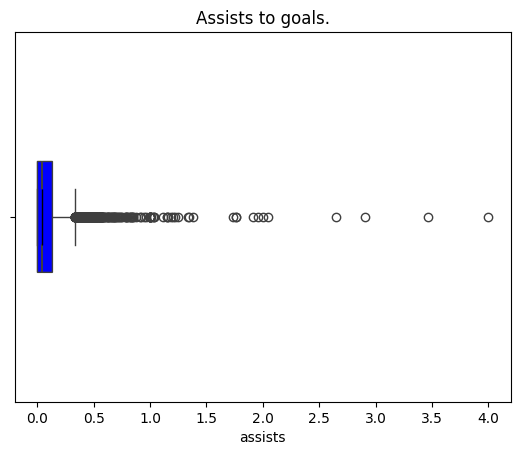

In [80]:
sns.boxplot(x=df["assists"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Assists to goals.")

plt.show();

In [81]:
df["assists"].describe()

count    10754.000000
mean         0.086978
std          0.143351
min          0.000000
25%          0.000000
50%          0.040773
75%          0.133136
max          4.000000
Name: assists, dtype: float64

En la categoría "assists" de la columna, que representa la cantidad de asistencias, la media es de 0.08 asistencias. La mayoría de los jugadores tienen una cantidad de asistencias muy bajas que va desde las 0 asistencias 0.13. Sin embargo, existen algunos jugadores que alcanzan las 4 asistencias.

- **Revisión columna "yellow cards"**

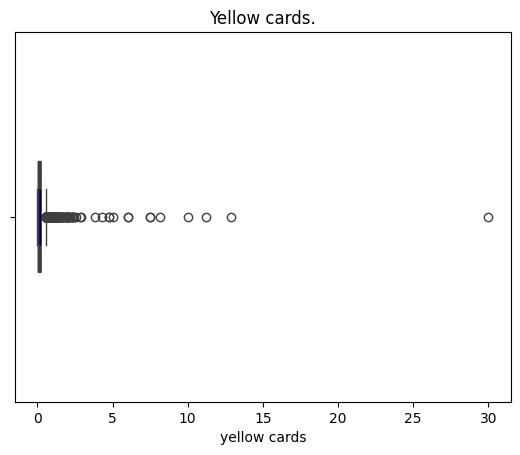

In [82]:
sns.boxplot(x=df["yellow cards"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Yellow cards.")

plt.show();

In [83]:
df["yellow cards"].describe()

count    10754.000000
mean         0.189757
std          0.432388
min          0.000000
25%          0.053191
50%          0.150250
75%          0.248276
max         30.000000
Name: yellow cards, dtype: float64

En la categoría "yellow cards" de la columna, que representa la cantidad de tarjetas amarillas, la media es de 0.18. La mayoría de los jugadores tienen una cantidad de tarjetas amarillas muy bajas que va desde las 0.05 a 0.24. Sin embargo, existen algunos jugadores que alcanzan las 30 tarjetas amarillas.

- **Revisión columna "second yellow cards"**

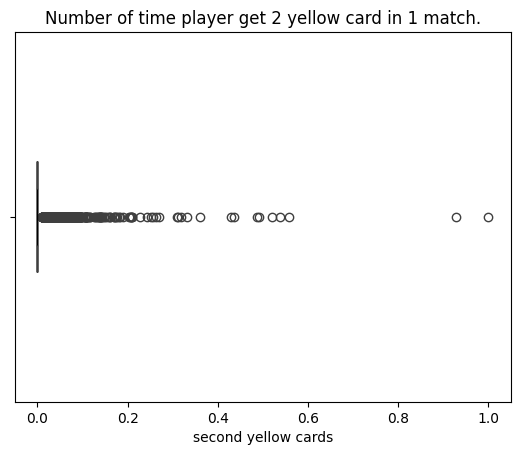

In [84]:
sns.boxplot(x=df["second yellow cards"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Number of time player get 2 yellow card in 1 match.")

plt.show();

In [85]:
df["second yellow cards"].describe()

count    10754.000000
mean         0.004666
std          0.025232
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: second yellow cards, dtype: float64

En la categoría "second yellow cards" de la columna, que representa la cantidad de veces que a un jugador le han sacado dos tarjetas amarillas por partido, la media es de 0.004. La mayoría de los jugadores no ha obtenido dos tarjetas amarillas por partido. Sin embargo, existen algunos jugadores que se escapan de esta media alcanzando el valor 1.0.

- **Revisión columna "red cards"**

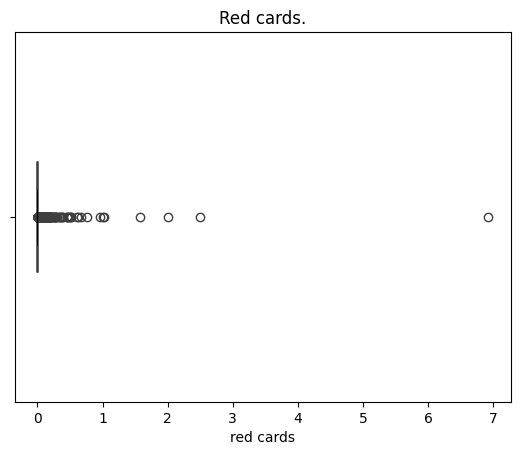

In [86]:
sns.boxplot(x=df["red cards"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Red cards.")

plt.show();

In [87]:
df["red cards"].describe()

count    10754.000000
mean         0.006826
std          0.081143
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.923077
Name: red cards, dtype: float64

En la categoría "red cards" de la columna, que representa la cantidad de tarjetas rojas, la media es de 0.006. La mayoría de los jugadores no tiene tarjetas rojas. Sin embargo, existen algunos jugadores que alcanzan las 6.9 tarjetas rojas.

- **Revisión columna "goals conceded"**

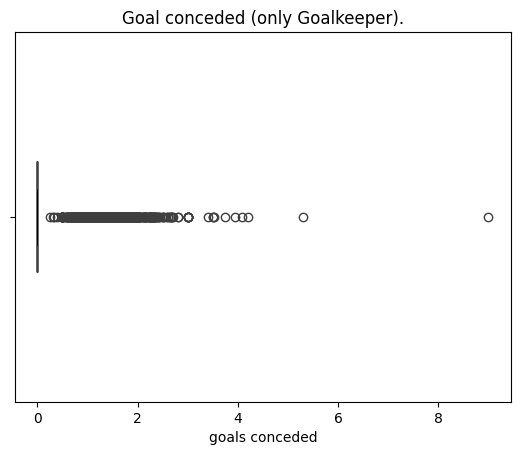

In [88]:
sns.boxplot(x=df["goals conceded"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Goal conceded (only Goalkeeper).")

plt.show();

In [89]:
df["goals conceded"].describe()

count    10754.000000
mean         0.131655
std          0.442335
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: goals conceded, dtype: float64

En la categoría "goals conceded" de la columna, que representa la cantidad de goles recibidos, la media es de 0.13. La mayoría de los jugadores incorporados en esta base de datos no ha recibido goles. Sin embargo, existen valores atípicos, donde un jugador alcanza los 9 goles recibidos. Se debe considerar que estos valores sólo corresponde a aquellos jugadores que son arqueros, que corresponden al 10.49% del total de jugadores del dataframe.

- **Revisión columna "clean sheets"**

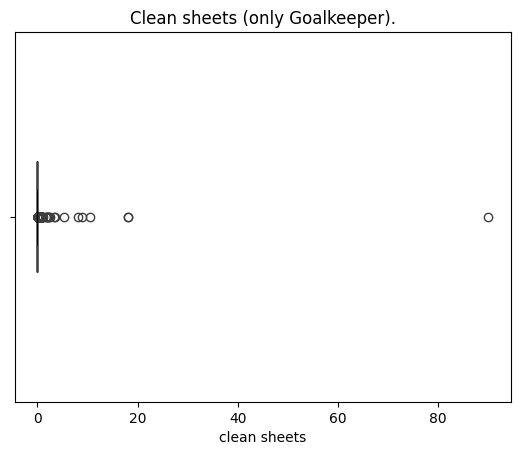

In [90]:
sns.boxplot(x=df["clean sheets"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Clean sheets (only Goalkeeper).")

plt.show();

In [91]:
df["clean sheets"].describe()

count    10754.000000
mean         0.044881
std          0.924437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         90.000000
Name: clean sheets, dtype: float64

En la categoría "clean sheets" de la columna, que representa la cantidad de porterías a cero, la media es de 0.04. La mayoría de los jugadores incorporados en esta base de datos no han tenido tenido partidos con porterías a cero. Sin embargo, existen valores atípicos, donde un jugador alcanza 90 partidos con porterías a cero. Se debe considerar que estos valores sólo corresponde a aquellos jugadores que son arqueros, que corresponden al 10.49% del total de jugadores del dataframe.

- **Revisión columna "minutes played"**

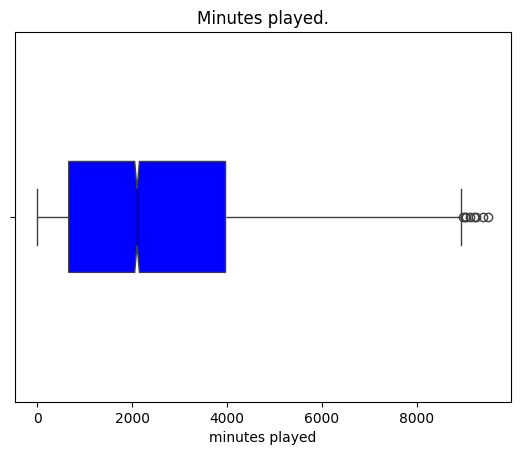

In [92]:
sns.boxplot(x=df["minutes played"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Minutes played.")

plt.show();

In [93]:
df["minutes played"].describe()

count    10754.000000
mean      2470.789381
std       2021.703271
min          0.000000
25%        660.000000
50%       2101.500000
75%       3968.000000
max       9510.000000
Name: minutes played, dtype: float64

En la categoría "minutes played" de la columna, que representa la cantidad de minutos jugados, la media es de 2470.78 minutos. La mayoría de los jugadores incorporados en esta base de datos han jugado entre 660y 3968 minutos. Sin embargo, existen valores atípicos, donde jugadores alcanzan los 9510 minutos jugados.

- **Revisión columna "days_injured"**

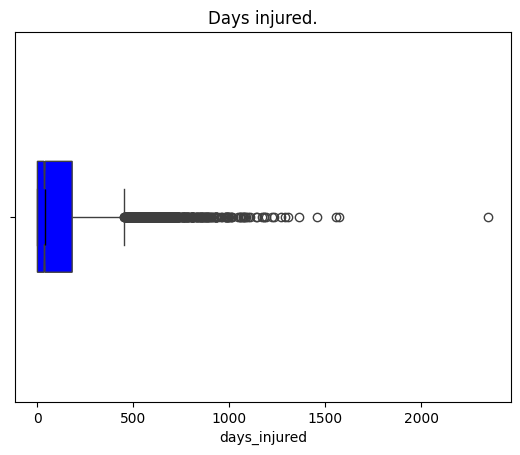

In [94]:
sns.boxplot(x=df["days_injured"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Days injured.")

plt.show();

In [95]:
df["days_injured"].describe()

count    10754.000000
mean       117.961689
std        175.206827
min          0.000000
25%          0.000000
50%         37.000000
75%        181.000000
max       2349.000000
Name: days_injured, dtype: float64

En la categoría "days_injured" de la columna, que representa la cantidad de días lesionados, la media es de 117.96 días. La mayoría de los jugadores incorporados en esta base de datos han estado lesionado entre 0 a 181 días. Sin embargo, existen valores atípicos, donde jugadores alcanzan los 2349 días lesionados.

- **Revisión columna "games_injured"**

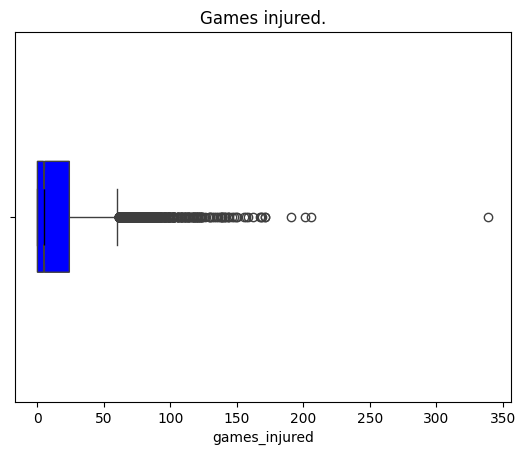

In [96]:
sns.boxplot(x=df["games_injured"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Games injured.")

plt.show();

In [97]:
df["games_injured"].describe()

count    10754.000000
mean        15.826297
std         23.383606
min          0.000000
25%          0.000000
50%          5.000000
75%         24.000000
max        339.000000
Name: games_injured, dtype: float64

En la categoría "games_injured" de la columna, que representa la cantidad de partidos lesionados, la media es de 15.82 partidos. La mayoría de los jugadores incorporados en esta base de datos han estado lesionado entre 0 a 24 partidos. Sin embargo, existen valores atípicos, donde jugadores alcanzan los 339 partidos lesionados.

- **Revisión columna "award"**

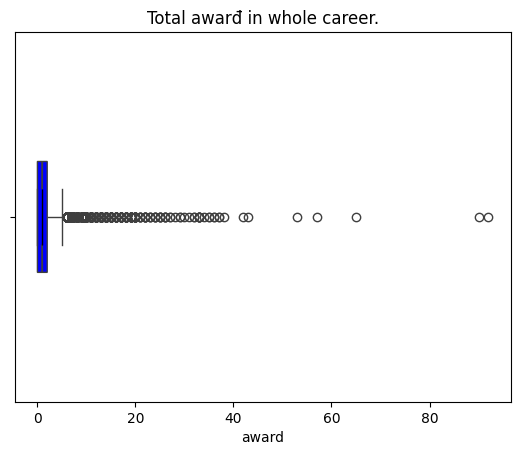

In [98]:
sns.boxplot(x=df["award"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Total awarđ in whole career.")

plt.show();

In [99]:
df["award"].describe()

count    10754.000000
mean         1.960759
std          3.743936
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         92.000000
Name: award, dtype: float64

En la categoría "award" de la columna, que representa los premios totales en su carrera, la media es de 1.96 premios. La mayoría de los jugadores incorporados en esta base de datos han obtenido entre 0 a 2 premios. Sin embargo, existen valores atípicos, donde jugadores han alcanzado 92 premios.

- **Revisión columna "current_value"**

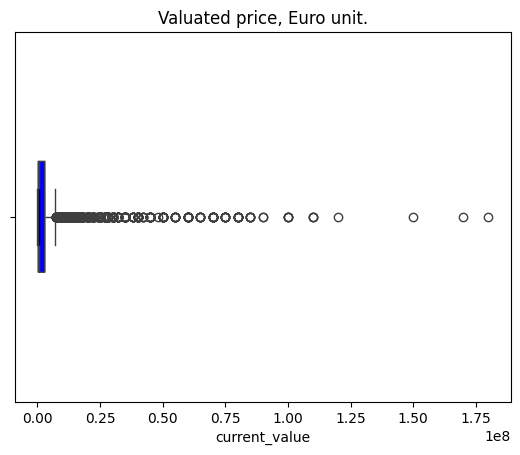

In [100]:
sns.boxplot(x=df["current_value"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Valuated price, Euro unit.")

plt.show();

In [101]:
df["current_value"].describe()

count    1.075400e+04
mean     3.622971e+06
std      9.095410e+06
min      0.000000e+00
25%      3.000000e+05
50%      8.000000e+05
75%      3.000000e+06
max      1.800000e+08
Name: current_value, dtype: float64

En la categoría "current_value" de la columna, que representa el precio tasado del futbolista (en Euro), la media es de €3.62 millones. La mayoría de los jugadores incorporados en esta base de datos están tasados entre los €300000 y €3000000 millones. Sin embargo, existen valores atípicos, donde el jugador con la tasación más alta es de €180 millones.

- **Revisión columna "highest_value"**

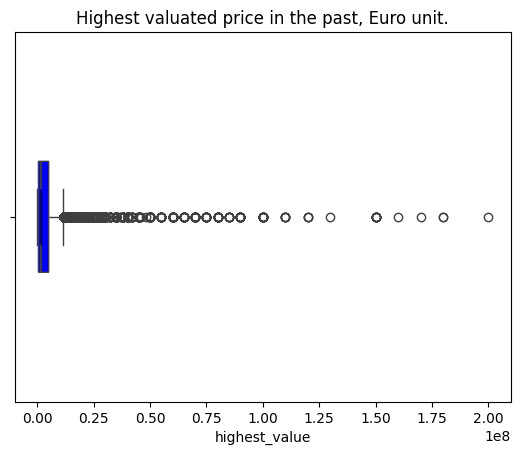

In [102]:
sns.boxplot(x=df["highest_value"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Highest valuated price in the past, Euro unit.")

plt.show();

In [103]:
df["highest_value"].describe()

count    1.075400e+04
mean     6.152606e+06
std      1.338988e+07
min      0.000000e+00
25%      4.500000e+05
50%      1.500000e+06
75%      5.000000e+06
max      2.000000e+08
Name: highest_value, dtype: float64

En la categoría "highest_value" de la columna, que representa el precio tasado más alto del futbolista en el pasado (en Euro), la media es de €6.15 millones. La mayoría de los jugadores incorporados en esta base de datos están tasados entre los €450000 y €5000000 millones. Sin embargo, existen valores atípicos, donde el jugador con la tasación más alta es de €200 millones.

- **Revisión columna "position_encoded"**

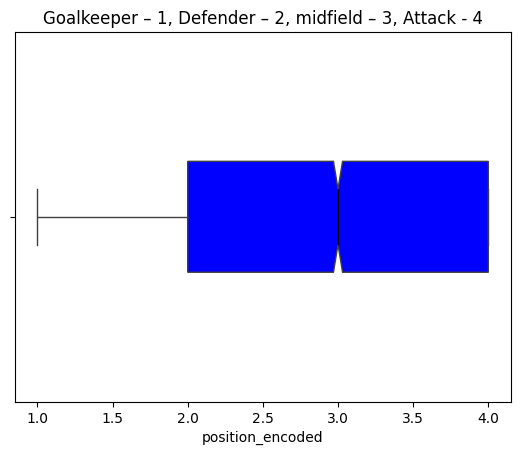

In [104]:
sns.boxplot(x=df["position_encoded"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("Goalkeeper – 1, Defender – 2, midfield – 3, Attack - 4")

plt.show();

In [105]:
df["position_encoded"].describe()

count    10754.000000
mean         2.713223
std          0.986356
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: position_encoded, dtype: float64

En la categoría "position_encoded" de la columna, que representa la posición del futbolista el cual ya está definido, se visualiza que la media está más cercana a defensas o mediocampistas. En menor parte de esta base de datos corresponde a los arqueros.

- **Revisión columna "winger"**

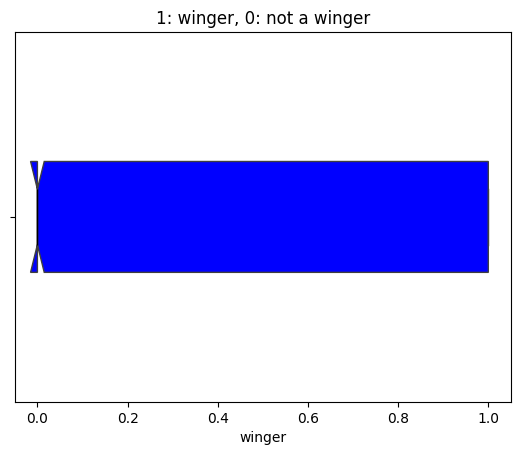

In [106]:
sns.boxplot(x=df["winger"], data=df,notch = True,
            linewidth=1,
            boxprops=dict(facecolor="b"),
            medianprops={"color": 'black', "linewidth": 1},
            width=0.3).set_title("1: winger, 0: not a winger")

plt.show();

In [107]:
df["winger"].describe()

count    10754.000000
mean         0.307513
std          0.461485
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: winger, dtype: float64

En la categoría "winger" de la columna, que representa a aquellos futbolistas que juegan de extremos, se visualiza que la media está más cercana a aquellos futbolistas que no juegan de extremos.

### - **Eliminación de columnas innecesarios**

Posterior a la revisión individual de la totalidad de las columnas del dataframe, se identificó que para efectos de la predicción del valor de transferencia de un futbolista no es necesario contar con las siguientes columnas:
- player
- team
- name
- position

A continuación, se procederá a eliminar estas cuatro columnas.

In [108]:
df.drop(["player","team","name","position"], axis=1, inplace=True)

Se revisa que se realice correctamente la eliminación.

In [109]:
df

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


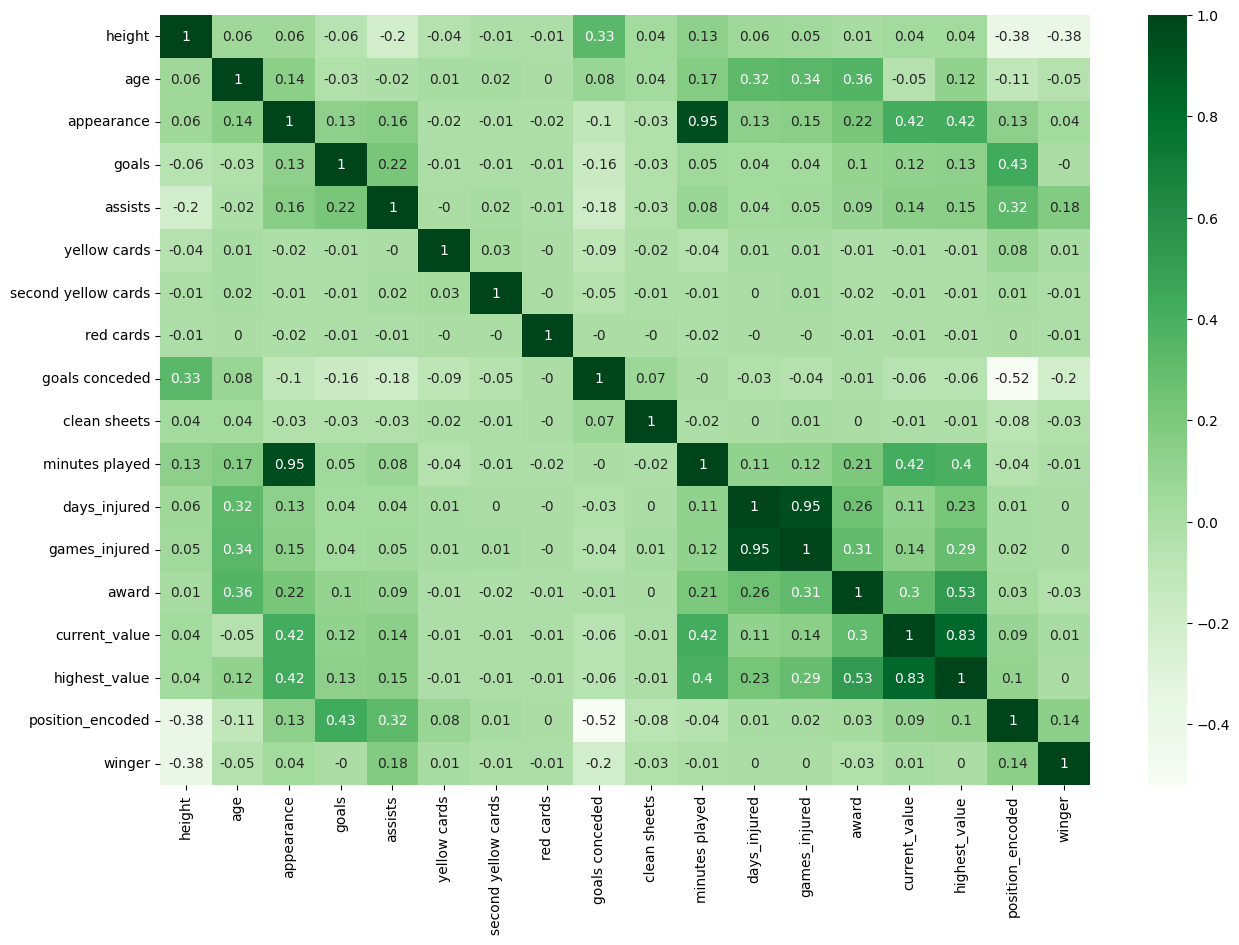

In [110]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr.round(2), cmap = "Greens", annot = True)
plt.show()